In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.pipeline import Pipeline

In [5]:
# Loading soccerdata
games = pd.read_csv('data/Soccer_data_three_seasons.csv')

#Data explenation
#FTHG – Full Time Home Goals
#FTAG – Full Time Away Goals
#FTR – Full Time Result (H = Home, D = Draw, A = Away)
#HTHG – Half Time Home Goals
#HTAG – Half Time Away Goals
#HTR – Half Time Result (H, D, A)
#HS – Home Shots
#AS – Away Shots
#HST – Home Shots on Target
#AST – Away Shots on Target
#HF – Home Fouls (Fouls commited)
#AF – Away Fouls
#HC – Home Corners
#AC – Away Corners
#HY – Home Yellow Cards
#AY – Away Yellow Cards
#HR – Home Red Cards
#AR – Away Red Cards
#B365H / B365D / B365A – Bet365 odds (Hjemme, Uafgjort, Ude)
#BWH / BWD / BWA – Bet & Win odds
#BFH / BFD / BFA – Betfair odds
#PSH / PSD / PSA – Pinnacle odds
#WHH / WHD / WHA – William Hill odds
#1XBH / 1XBD / 1XBA – 1xBet odds
#MaxH / MaxD / MaxA – Highest odds on the market for H, D, A
#AvgH / AvgD / AvgA – Avg. odds

In [6]:
# Outputting first 5 lines
games

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,E0,19/05/2024,16:00,Crystal Palace,Aston Villa,5,0,H,2,0,...,2.78,-0.75,1.73,2.08,1.78,2.16,1.93,2.21,1.81,2.05
1136,E0,19/05/2024,16:00,Liverpool,Wolves,2,0,H,2,0,...,5.17,-2.75,2.07,1.86,2.04,1.85,2.10,1.89,2.04,1.82
1137,E0,19/05/2024,16:00,Luton,Fulham,2,4,A,1,2,...,2.69,0.25,2.00,1.93,1.99,1.93,2.02,1.94,1.96,1.91
1138,E0,19/05/2024,16:00,Man City,West Ham,3,1,H,2,1,...,4.82,-3.00,2.03,1.90,1.99,1.90,2.05,1.99,1.96,1.91


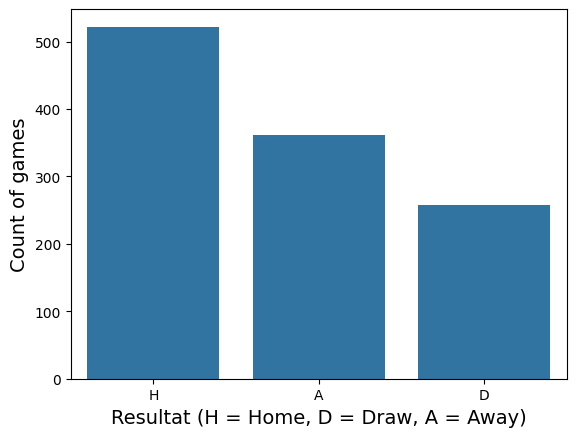

In [7]:
# sns.countplot() creates a bar plot
p = sns.countplot(data=games, x="FTR")


# matplotlib functions are used to customize labels
p.set_xlabel("Resultat (H = Home, D = Draw, A = Away)", fontsize=14)
p.set_ylabel("Count of games", fontsize=14)
plt.show()

In [8]:
# Define input and output features
# Shapley values machine learning - use later to find most important features
#X = games[['B365H', 'B365D', 'B365A']]
#y = games['FTR']



X = games[['B365H', 'B365D', 'B365A', 'AvgH', 'AvgD', 'AvgA', 'PSH', 'PSD', 'PSA', 'Avg>2.5', 'Avg<2.5','AHCh']]
y = games['FTR']

In [9]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the input features, as KNN uses distances
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, np.ravel(y_train))

# Make predictions
y_pred = knn.predict(X_train)
y_pred

array(['H', 'D', 'A', 'H', 'A', 'D', 'A', 'H', 'A', 'A', 'H', 'D', 'H',
       'H', 'H', 'H', 'A', 'A', 'A', 'A', 'H', 'H', 'D', 'A', 'H', 'A',
       'D', 'H', 'A', 'H', 'A', 'H', 'H', 'H', 'H', 'D', 'A', 'A', 'A',
       'H', 'A', 'H', 'H', 'H', 'H', 'A', 'H', 'H', 'D', 'H', 'D', 'A',
       'H', 'H', 'H', 'H', 'H', 'A', 'A', 'A', 'H', 'D', 'A', 'H', 'H',
       'A', 'A', 'H', 'A', 'H', 'A', 'H', 'A', 'D', 'H', 'H', 'H', 'H',
       'H', 'A', 'H', 'A', 'H', 'H', 'H', 'A', 'A', 'D', 'D', 'H', 'A',
       'H', 'H', 'A', 'H', 'A', 'D', 'A', 'H', 'D', 'A', 'H', 'D', 'A',
       'A', 'A', 'H', 'A', 'H', 'A', 'H', 'A', 'H', 'A', 'A', 'A', 'H',
       'H', 'H', 'A', 'H', 'H', 'H', 'H', 'H', 'A', 'A', 'H', 'A', 'H',
       'H', 'D', 'A', 'H', 'A', 'A', 'H', 'H', 'A', 'H', 'A', 'A', 'A',
       'A', 'A', 'H', 'H', 'A', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'A',
       'D', 'H', 'A', 'D', 'H', 'H', 'H', 'H', 'A', 'D', 'H', 'H', 'A',
       'H', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'H', 'D', 'H', 'H

In [10]:
# calculate the confusion matrix for each model
#print("KNN \n", metrics.confusion_matrix(np.ravel(y), y_pred))

print("Accuracy:", accuracy_score(y_train, y_pred))
print("Precision (macro):", precision_score(y_train, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_train, y_pred, average='macro'))
print("Confusion matrix:\n", confusion_matrix(y_train, y_pred))

Accuracy: 0.625
Precision (macro): 0.593076241944623
Recall (macro): 0.5690822613911507
Confusion matrix:
 [[202  17  74]
 [ 69  54  73]
 [ 75  34 314]]
